# EDA for Washington, DC Data

In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import requests as re
import json 
%matplotlib inline

In [3]:
dcdata = pd.read_csv("crashesDCdf_clean.csv", low_memory = False)

In [4]:
dcdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246150 entries, 0 to 246149
Data columns (total 61 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  246150 non-null  int64  
 1   X                           246150 non-null  float64
 2   Y                           246150 non-null  float64
 3   OBJECTID                    246150 non-null  int64  
 4   CRIMEID                     246150 non-null  int64  
 5   CCN                         246150 non-null  object 
 6   REPORTDATE                  246150 non-null  object 
 7   ROUTEID                     246150 non-null  object 
 8   MEASURE                     246150 non-null  float64
 9   OFFSET                      246150 non-null  float64
 10  STREETSEGID                 208314 non-null  float64
 11  ROADWAYSEGID                208314 non-null  float64
 12  FROMDATE                    246150 non-null  object 
 13  TODATE        

In [5]:
dcdata['FATAL_DRIVER'].unique()

array([0, 1, 2])

In [6]:
# This is a companion data set to dcdata, linked by "CRIMEID"

dcdetaildata = pd.read_csv("https://opendata.arcgis.com/datasets/70248b73c20f46b0a5ee895fc91d6222_25.csv", low_memory = False)

In [7]:
dcCrashes = dcdata.merge(dcdetaildata, on = "CRIMEID", how = 'outer')

In [8]:
dcCrashes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598320 entries, 0 to 598319
Data columns (total 75 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  597502 non-null  float64
 1   X                           597502 non-null  float64
 2   Y                           597502 non-null  float64
 3   OBJECTID_x                  597502 non-null  float64
 4   CRIMEID                     598320 non-null  int64  
 5   CCN_x                       597502 non-null  object 
 6   REPORTDATE                  597502 non-null  object 
 7   ROUTEID                     597502 non-null  object 
 8   MEASURE                     597502 non-null  float64
 9   OFFSET                      597502 non-null  float64
 10  STREETSEGID                 511703 non-null  float64
 11  ROADWAYSEGID                511703 non-null  float64
 12  FROMDATE                    597502 non-null  object 
 13  TODATE        

In [9]:
# Check the format for the report dates

dcCrashes['REPORTDATE'].head()

0    2021/03/10 02:41:05+00
1    2021/03/10 02:41:05+00
2    2021/03/10 02:57:24+00
3    2021/03/10 02:57:24+00
4    2021/03/10 03:23:07+00
Name: REPORTDATE, dtype: object

In [10]:
# Change to date-time format, then separate years and years-months for comparison

dcCrashes['REPORTDATE'] = pd.to_datetime(dcCrashes['REPORTDATE'])
dcCrashes['YEAR'] = pd.DatetimeIndex(dcCrashes['REPORTDATE']).year.astype('Int64')
dcCrashes['MONTH_YEAR'] = pd.to_datetime(dcCrashes['REPORTDATE']).dt.to_period('M')

/Users/maryglantz/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [11]:
dcCrashes['YEAR'].head()

0    2021
1    2021
2    2021
3    2021
4    2021
Name: YEAR, dtype: object

In [12]:
dcCrashes['YEAR'].unique()

array([2021, 2020, 2014, 2015, 2013, 2017, 2011, 2010, 2012, 2016, 2009,
       2018, 2019, 1970, 2008, 2005, 1993, 2000, 2002, 2006, 2007, 1996,
       2004, 2001, 1997, 1992, 1989, 1998, 1994, 1990, 2003, 1999, 1991,
       1975, 1995, 2025, <NA>], dtype=object)

2025 has not happened yet, so I will delete that entry.

In [13]:
index2025 = dcCrashes[dcCrashes['YEAR'] == 2025].index
index2025

Int64Index([543191, 543192], dtype='int64')

In [14]:
dcCrashes.drop(index2025, inplace = True)

In [15]:
dcCrashes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598318 entries, 0 to 598319
Data columns (total 77 columns):
 #   Column                      Non-Null Count   Dtype              
---  ------                      --------------   -----              
 0   Unnamed: 0                  597500 non-null  float64            
 1   X                           597500 non-null  float64            
 2   Y                           597500 non-null  float64            
 3   OBJECTID_x                  597500 non-null  float64            
 4   CRIMEID                     598318 non-null  int64              
 5   CCN_x                       597500 non-null  object             
 6   REPORTDATE                  597500 non-null  datetime64[ns, UTC]
 7   ROUTEID                     597500 non-null  object             
 8   MEASURE                     597500 non-null  float64            
 9   OFFSET                      597500 non-null  float64            
 10  STREETSEGID                 511701 non-null 

## Fatal Crashes in DC

In [16]:
dcCrashes['FATAL'].unique()

array(['N', nan, 'Y'], dtype=object)

In [17]:
# How many of my entries are na for Fatalities?
dcCrashes['FATAL'].isna().sum()

1828

In [18]:
# Since I'm just counting fatalities, 1828 of about 60000 should be fine.  
isfatal = dcCrashes['FATAL'] == 'Y'
fatalCrashes = dcCrashes[isfatal]
fatalCrashes['FATAL']

3632      Y
6325      Y
8062      Y
10104     Y
11333     Y
         ..
587906    Y
592080    Y
592689    Y
596271    Y
597600    Y
Name: FATAL, Length: 417, dtype: object

In [19]:
fatalCrashes.groupby(['YEAR']).size()

YEAR
1970     2
2008    11
2009    25
2010    21
2011    22
2012    24
2013    44
2014    53
2015    49
2016    36
2017    34
2018    32
2019    27
2020    32
2021     4
dtype: int64

#### Fatal Crashes in DC **declined** from 34 in 2017 to 32 in 2020, or by 5%.  

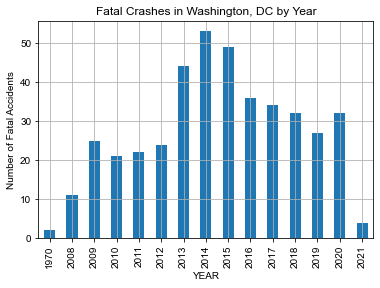

In [20]:
plt.title("Fatal Crashes in Washington, DC by Year")
plt.xlabel("Year")
plt.ylabel("Number of Fatal Accidents")
plt.style.use('seaborn-darkgrid')

fatalCrashes.groupby(['YEAR']).size().plot(kind = 'bar')


The visualization shows, however, that despite the overall decline from 2017, 2020 did uptick from 2019.  

Let's categorize the data by type of fatality, and see if it varies.

In [21]:
fatalCrashes["FATAL_PEDESTRIAN"].unique()

array([ 0.,  1.,  2., nan])

In [22]:
fatalCrashes["FATAL_DRIVER"].unique()

array([ 1.,  0.,  2., nan])

In [23]:
fatalCrashes["FATAL_BICYCLIST"].unique()

array([ 0.,  1., nan])

This data lists the number of fatalities of each type per each incident.  

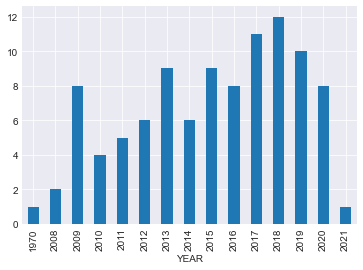

In [24]:
fatalPeds = fatalCrashes["FATAL_PEDESTRIAN"] != 0
fatalPedsCrash = fatalCrashes[fatalPeds]
fatalPedsCrash.groupby(['YEAR']).size().plot(kind = 'bar')
plt.style.use('seaborn-darkgrid')

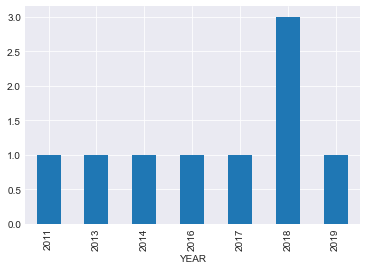

In [25]:
fatalBikes = fatalCrashes["FATAL_BICYCLIST"] != 0
fatalBikesCrash = fatalCrashes[fatalBikes]
fatalBikesCrash.groupby(['YEAR']).size().plot(kind = 'bar')
plt.style.use('seaborn-darkgrid')

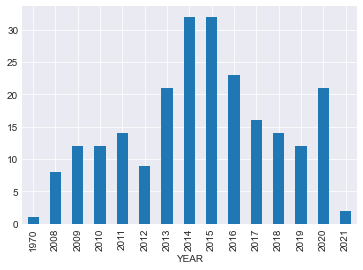

In [26]:
fatalCars = fatalCrashes["FATAL_DRIVER"] != 0
fatalCarsCrash = fatalCrashes[fatalCars]
fatalCarsCrash.groupby(['YEAR']).size().plot(kind = 'bar')
plt.style.use('fivethirtyeight')

This is a little surprising.  I suspected that with the pandemic, more people were walking and biking, and, thus, those numbers would have increased.  Paradoxically, the fatalities to people inside the vehicle actually increased.  Perhaps this was due to a decrease in traffic, resulting in less traffic, but more severe crashes.

Sadly, DC does not have traffic volume data for 2020 available yet (the most recent is 2018).

In [27]:
# Do the same thing for major injuries
dcCrashes['MAJORINJURY'].unique()

array(['N', nan, 'Y'], dtype=object)

In [28]:
dcCrashes['MAJORINJURY'].isna().sum()

1828

In [29]:
# Since I'm just counting fatalities, 1828 of about 60000 should be fine.  
isMajor = dcCrashes['MAJORINJURY'] == 'Y'
majorCrashes = dcCrashes[isMajor]
majorCrashes['MAJORINJURY']

287       Y
596       Y
601       Y
603       Y
606       Y
         ..
596880    Y
597196    Y
597299    Y
597432    Y
597519    Y
Name: MAJORINJURY, Length: 21373, dtype: object

In [30]:
majorCrashes.groupby(['YEAR']).size()

YEAR
1970     168
2000      25
2008     369
2009    2694
2010    2106
2011    3106
2012    2914
2013    3039
2014    3109
2015    1551
2016     505
2017     471
2018     433
2019     445
2020     373
2021      64
dtype: int64

#### Major injuries in DC **declined** from 471 in 2017 to 373 in 2020, or about 21%

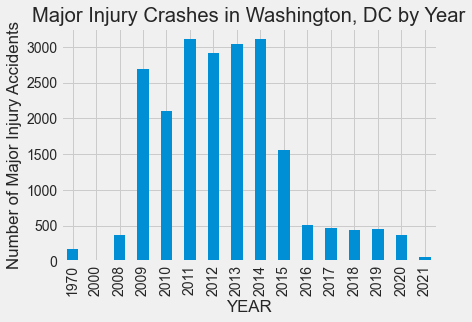

In [31]:
plt.title("Major Injury Crashes in Washington, DC by Year")
plt.xlabel("Year")
plt.ylabel("Number of Major Injury Accidents")

majorCrashes.groupby(['YEAR']).size().plot(kind = 'bar')
plt.style.use('fivethirtyeight')


While I'm comparing DC's rates with Montgomery County's from 2017 to 2020, it is interesting to note that DC began implementation of VisionZero in 2015.

In [32]:
since2015 = dcCrashes['YEAR']>=2015 
since2015Crashes = dcCrashes[since2015]
newMajorCrashes = since2015Crashes[isMajor]
newMajorCrashes['MAJORINJURY']

newFatalCrashes = since2015Crashes[isfatal]
newFatalCrashes['FATAL']



<ipython-input-32-465d5d9c455b>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  newMajorCrashes = since2015Crashes[isMajor]
<ipython-input-32-465d5d9c455b>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  newFatalCrashes = since2015Crashes[isfatal]


3632      Y
6325      Y
13049     Y
14109     Y
25268     Y
         ..
580676    Y
581627    Y
592080    Y
592689    Y
596271    Y
Name: FATAL, Length: 214, dtype: object

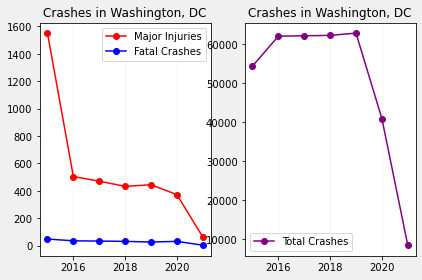

In [33]:
fig = plt.figure()
plt.style.use('default')
plt.tight_layout()

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

plt.title("Crashes in Washington, DC")
ax1.plot(newMajorCrashes.groupby(['YEAR']).size(), label = "Major Injuries", color = 'red', marker = 'o')
ax1.plot(newFatalCrashes.groupby(['YEAR']).size(), label = "Fatal Crashes", color = 'blue', marker = 'o')
ax1.set_title("Crashes in Washington, DC")


ax1.legend()
ax1.grid(axis='x', color='0.95')

ax2.plot(since2015Crashes.groupby(['YEAR']).size(), label = "Total Crashes", color = 'purple', marker = 'o')

ax2.legend()
ax2.set_title("Crashes in Washington, DC")
ax2.grid(axis='x', color='0.95')



In [34]:
# Save edited dataframe for statistical analysis use in another notebook

dcCrashes.to_csv("dcCrashes.csv")

In [35]:
# Get ACS census data for Washington, DC

dc_pop = re.get('https://api.census.gov/data/2019/acs/acs1/?get=NAME,B01001_001E,B01002_001E,C22001_001E,B25064_001E'\
                '&for=county:*&in=state:11').json()

In [36]:
dc_pop = pd.DataFrame(dc_pop)
dc_pop.rename(columns=dc_pop.iloc[0], inplace=True)
dc_pop = dc_pop.iloc[1:].rename(columns = {'B01001_001E': 'Population',
                                     'B01002_001E': 'Median Age',
                                     'C22001_001E': 'Household Poverty',
                                     'B25064_001E': 'Median Gross Rent'})

In [37]:
dc_pop

,NAME,Population,Median Age,Household Poverty,Median Gross Rent,state,county
1,"District of Columbia, District of Columbia",705749,34.3,291570,1603,11,001
